c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


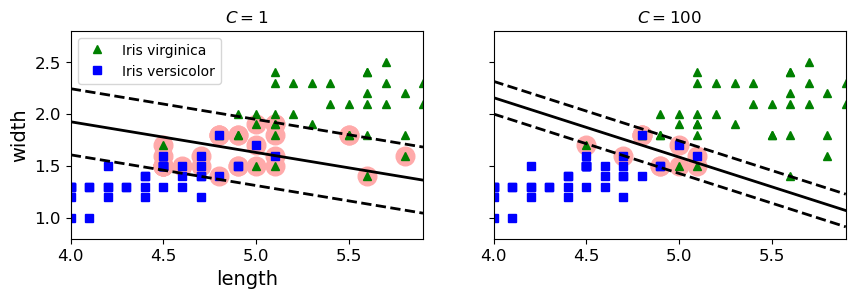

In [ ]:
# demo
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 设置字体大小
mpl.rc("axes",labelsize=14)
mpl.rc("xtick",labelsize=12)
mpl.rc("ytick",labelsize=12)

# 创建数据集
iris = datasets.load_iris()

# 这次选择其中两个作为特征,二分类问题，分类的结果就是是否是“2”这个类,转换为二分类的问题
X = iris.data[:,(2,3)]
Y = (iris["target"]==2).astype(np.float64)


# 创建管道，管道就是来定义一系列操作，然后可以一起操作的 包括标准化和创建支持向量机
# linear_svc步骤使用LinearSVC作为线性支持向量机分类器
svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge",random_state=42))
])

# 模型训练
svm_clf.fit(X,Y)

# 预测
svm_clf.predict([[5.5,1.7]])

# 改变C的值，观看间隙大小 
scaler = StandardScaler()
Linesvc1 = LinearSVC(C=1,loss="hinge",random_state=42)
Linesvc2 = LinearSVC(C=100,loss="hinge",random_state=42)
svm_clf1 = Pipeline([
    ("scaler",scaler),
    ("linear_svc",Linesvc1)
])

svm_clf2 = Pipeline([
    ("scaler",scaler),
    ("linear_svc",Linesvc2)
])
svm_clf1.fit(X,Y)
svm_clf2.fit(X,Y)

# 获取两个模型的参数
# 计算样本点到超平面的距离
b1 = Linesvc1.decision_function([-scaler.mean_/scaler.scale_])
b2 = Linesvc2.decision_function([-scaler.mean_/scaler.scale_])

w1 = Linesvc1.coef_[0] / scaler.scale_
w2 = Linesvc2.coef_[0] / scaler.scale_

# 转换为数组
Linesvc1.intercept_ = np.array([b1])
Linesvc2.intercept_ = np.array([b2])
Linesvc1.coef_ = np.array([w1])
Linesvc2.coef_ = np.array([w2])

# 寻找支持向量
t = Y*2-1

support_idx1 = (t*(X.dot(w1)+b1)<1).ravel()
support_idx2 = (t*(X.dot(w2)+b2)<1).ravel()

Linesvc1.support_vectors_ = X[support_idx1]
Linesvc2.support_vectors_ = X[support_idx2]

# 定义决策边界函数
# 可视化决策边界
def plot_svc(svm_clf,xmin,xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    X0 = np.linspace(xmin,xmax,200)

    decision_boundary = -w[0]/w[1] * X0 - b/w[1]

    margin = 1/w[1]
    # 得到两边
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    #得到支持向量
    svs = svm_clf.support_vectors_

    plt.scatter(svs[:,0],svs[:,1],s=180,facecolors="#FFAAAA")
    plt.plot(X0,decision_boundary,"k-",linewidth=2)
    plt.plot(X0,gutter_up,"k--",linewidth=2)
    plt.plot(X0,gutter_down,"k--",linewidth=2)


fig,axes = plt.subplots(ncols=2,figsize=(10,2.7),sharey=True)
plt.sca(axes[0])
plt.plot(X[:,0][Y==1],X[:,1][Y==1],"g^",label="Iris virginica")
plt.plot(X[:,0][Y==0],X[:,1][Y==0],"bs",label="Iris versicolor")
plt.axis([4,5.9,0.8,2.8])
plot_svc(Linesvc1,4,5.9)
plt.xlabel("length")
plt.ylabel("width")
plt.legend(loc="upper left")
plt.title("$C={}$".format(Linesvc1.C))


plt.sca(axes[1])
plt.plot(X[:,0][Y==1],X[:,1][Y==1],"g^",label="Iris virginica")
plt.plot(X[:,0][Y==0],X[:,1][Y==0],"bs",label="Iris versicolor")
plt.axis([4,5.9,0.8,2.8])
plot_svc(Linesvc2,4,5.9)
plt.title("$C={}$".format(Linesvc2.C))

plt.savefig("ouput_plot/demo.png")

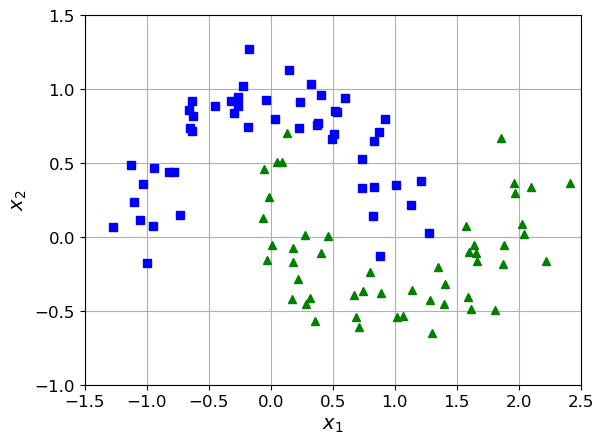

In [ ]:
# 非线性分类
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

def plot_data(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
    plt.axis(axes)
    plt.grid(True,which="both")
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

plot_data(X,y,[-1.5,2.5,-1,1.5])
plt.show()

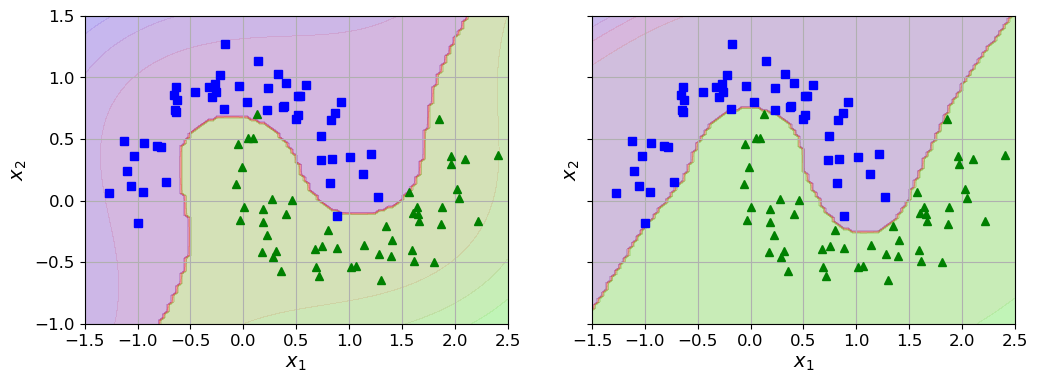

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# 可视化函数
def poly_predictions(clf,axis):
    x0s = np.linspace(axis[0],axis[1],100)
    x1s = np.linspace(axis[2],axis[3],100)
    # 生成网格图标
    x0,x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    # 预测值
    y_pred = clf.predict(X).reshape(x0.shape)
    # 计算到超平面的距离
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
    plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)

# 创建管道

poly_kernel_svm_clf1 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
])
# 这里也改变了coef0的值，也可以不改变，它是表示多项式核函数的常量。
# 当次数变大时，建议同时修改常数项以平衡。
poly_kernel_svm_clf2 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=10,coef0=1,C=5))
])
# 训练
poly_kernel_svm_clf1.fit(X,y)
poly_kernel_svm_clf2.fit(X,y)
# 画图
fig,axes = plt.subplots(ncols=2,figsize=(12,4),sharey=True)
plt.sca(axes[0])
poly_predictions(poly_kernel_svm_clf1,[-1.5,2.5,-1,1.5])
plot_data(X,y,[-1.5,2.5,-1,1.5])
# 管道二
plt.sca(axes[1])
poly_predictions(poly_kernel_svm_clf2,[-1.5,2.5,-1,1.5])
plot_data(X,y,[-1.5,2.5,-1,1.5])
plt.savefig("ouput_plot/poly.png")

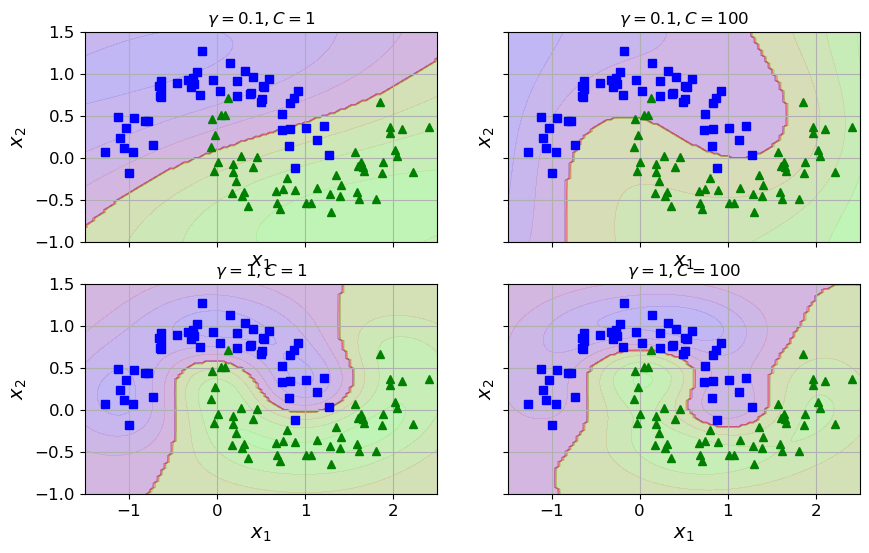

In [ ]:
# 高斯核函数是比较好的核函数
# 需要设置参数gamma和C

# 这里直接使用四个gamma和C  来对比看一下
# 因为说实话设置什么参数咱也不好确定
gamma1,gamma2 = 0.1,1
C1,C2 = 1,100
hyperparams = [(gamma1,C1),(gamma1,C2),(gamma2,C1),(gamma2,C2)]
svm_guss_clfs = []

for gamma,C in hyperparams:
    guss_kernel_svm_clf = Pipeline([
        ("scaler",StandardScaler()),
        ("svm_clf",SVC(kernel="rbf",gamma=gamma,C=C))
    ])
    guss_kernel_svm_clf.fit(X,y)
    svm_guss_clfs.append(guss_kernel_svm_clf)

fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(10,6),sharex=True,sharey=True)

for i,svm_guss_clf1 in enumerate(svm_guss_clfs):
    plt.sca(axes[i//2,i%2])

    poly_predictions(svm_guss_clf1,[-1.5,2.5,-1,1.5])
    plot_data(X,y,[-1.5,2.5,-1,1.5])
    gamma,C = hyperparams[i]
    plt.title(r"$\gamma={},C={}$".format(gamma,C))
plt.savefig("ouput_plot/guss.png")

In [ ]:
# 多分类
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVM分类器
svm = SVC(kernel='linear')

# 在训练集上训练SVM模型
svm.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = svm.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建SVM分类器
svm = SVC(kernel='linear')

# 创建One-vs-Rest分类器
ovr = OneVsRestClassifier(svm)

# 在训练集上训练One-vs-Rest模型
ovr.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = ovr.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


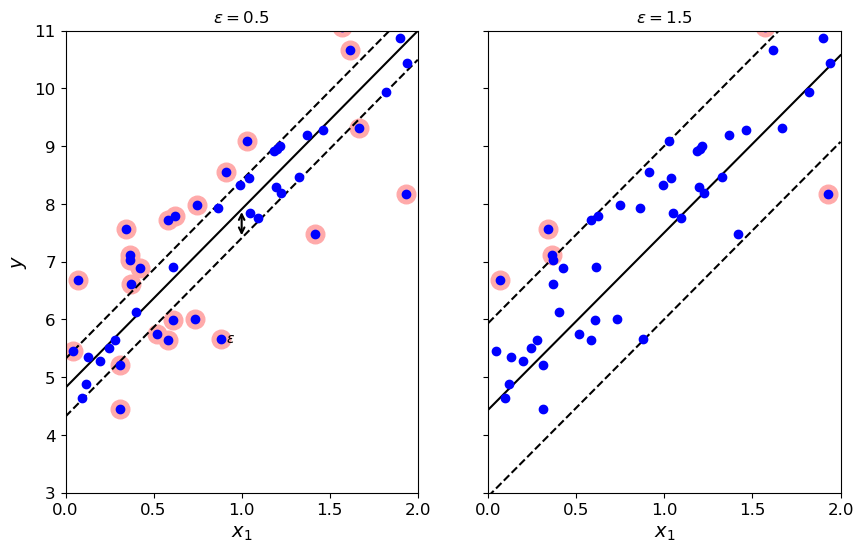

In [ ]:
# 线性回归
import numpy as np
from sklearn.svm import LinearSVR

def find_support_vectors(svm_reg,X,y):
    y_pred = svm_reg.predict(X)
    #选择误差小于给定epsilon的样本点
    off_margin = (np.abs(y-y_pred)>=svm_reg.epsilon)
    #使用np.argwhere()函数，找到布尔数组中值为True的索引
    # 即支持向量
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg,X,y,axes):
    xls = np.linspace(axes[0],axes[1],100).reshape(100,1)
    y_pred = svm_reg.predict(xls)
    #可视化预测点
    plt.plot(xls,y_pred,"k-")
    #可视化预测边界
    plt.plot(xls,y_pred+svm_reg.epsilon,"k--")
    plt.plot(xls,y_pred-svm_reg.epsilon,"k--")
    # 绘制支持向量
    plt.scatter(X[svm_reg.support_],y[svm_reg.support_],s=180,facecolor="#FFAAAA")
    plt.plot(X,y,"bo")
    plt.xlabel(r"$x_1$")
    plt.axis(axes)

np.random.seed(42)
m = 50
X = 2* np.random.rand(m,1)
y = (5+3*X+np.random.randn(m,1)).ravel()
#epsilon是一个控制回归模型的容忍度（tolerance）的参数。
# 在支持向量机回归中，模型的目标是使大部分样本点位于间隔带（回归边界）内，
# 而epsilon定义了间隔带的宽度。
# 较大的epsilon值允许更多的样本点位于间隔带之外，从而使模型更容忍噪声和离群点。
svm_reg1 = LinearSVR(epsilon=0.5,random_state=42)
svm_reg2 = LinearSVR(epsilon=1.5,random_state=42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

#计算支持向量
svm_reg1.support_ = find_support_vectors(svm_reg1,X,y)
svm_reg2.support_ = find_support_vectors(svm_reg2,X,y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
fig,axes = plt.subplots(ncols=2,figsize=(10,6),sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1,X,y,[0,2,3,11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon))
plt.ylabel(r"$y$")
#标注epsilon
#使用plt.annotate()函数在图中添加一个箭头和文本来标注epsilon的范围。
#xy参数指定箭头的起点坐标，xytext参数指定文本的坐标。箭头的样式和线宽通过arrowprops参数设置。
plt.annotate(
    '',xy = (eps_x1,eps_y_pred),xycoords="data",
    xytext=(eps_x1,eps_y_pred-svm_reg1.epsilon),
    textcoords="data",arrowprops={'arrowstyle':'<->',"linewidth":1.5}
)
plt.text(0.91,5.6,r"$\epsilon$")

plt.sca(axes[1])
plot_svm_regression(svm_reg2,X,y,[0,2,3,11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon))
plt.savefig("ouput_plot/line_reg.png")
plt.show()

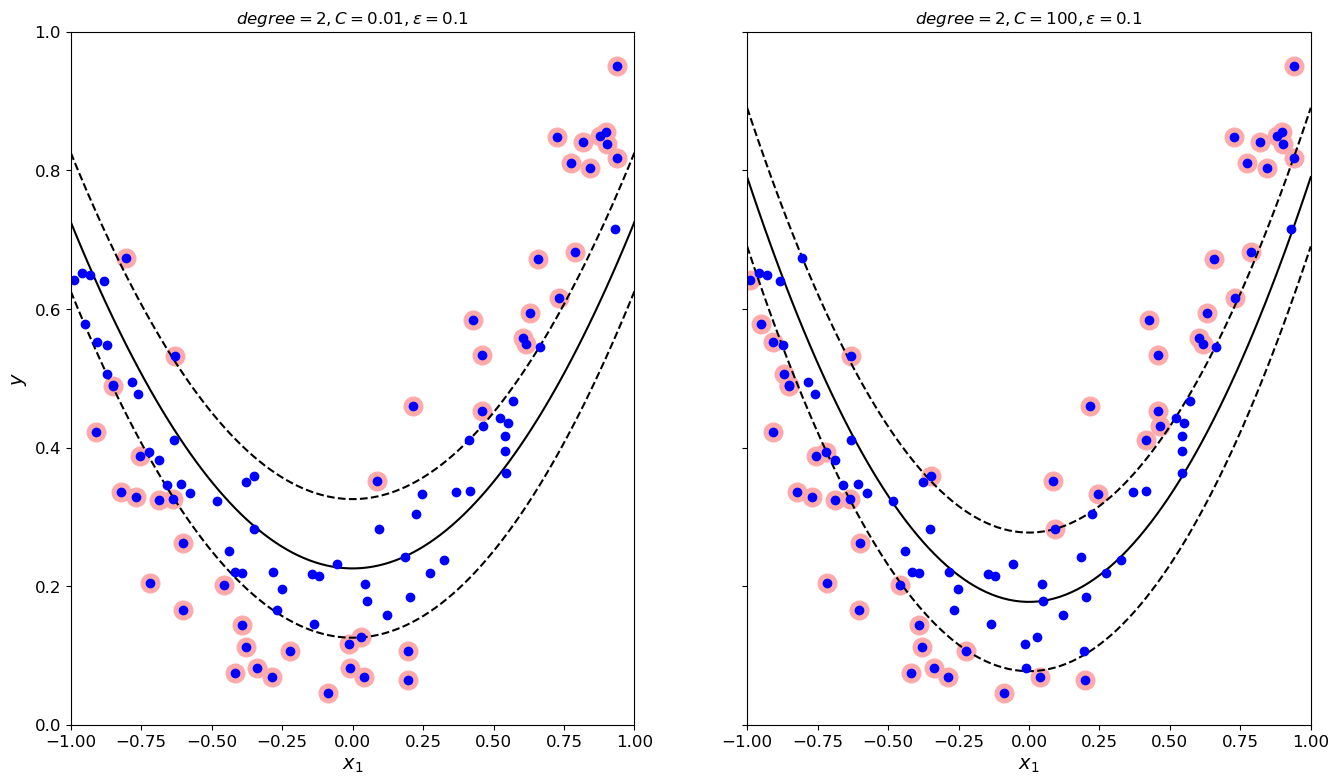

In [ ]:
# 非线性回归

from sklearn.svm import SVR
np.random.seed(42)
m = 100
# 这个函数返回一个形状为(100, 1)的随机数组，其中的值在[0, 1)之间。
X = 2*np.random.rand(m,1)-1
y = (0.2+0.2*X+0.6*X**2+np.random.randn(m,1)/10).ravel()
# 创建支持向量回归

svm_poly_reg1 = SVR(kernel="poly",degree=2,C=0.01,epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly",degree=2,C=100,epsilon=0.1)

#较小的gamma值会导致高斯核函数的曲线更宽，模型更加平滑。
#较大的gamma值会导致高斯核函数的曲线更窄,模型更加复杂。

# 训练
svm_poly_reg1.fit(X,y)
svm_poly_reg2.fit(X,y)


# 可视化
fig,axes = plt.subplots(ncols=2,figsize=(16,9),sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1,X,y,[-1,1,0,1])
plt.title(r"$degree={} , C={} ,\epsilon={}$".format(svm_poly_reg1.degree,svm_poly_reg1.C,svm_poly_reg1.epsilon))
plt.ylabel(r"$y$")

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2,X,y,[-1,1,0,1])
plt.title(r"$degree={}, C={} ,\epsilon={}$".format(svm_poly_reg2.degree,svm_poly_reg2.C,svm_poly_reg2.epsilon))
plt.savefig("ouput_plot/ploy_reg.png")

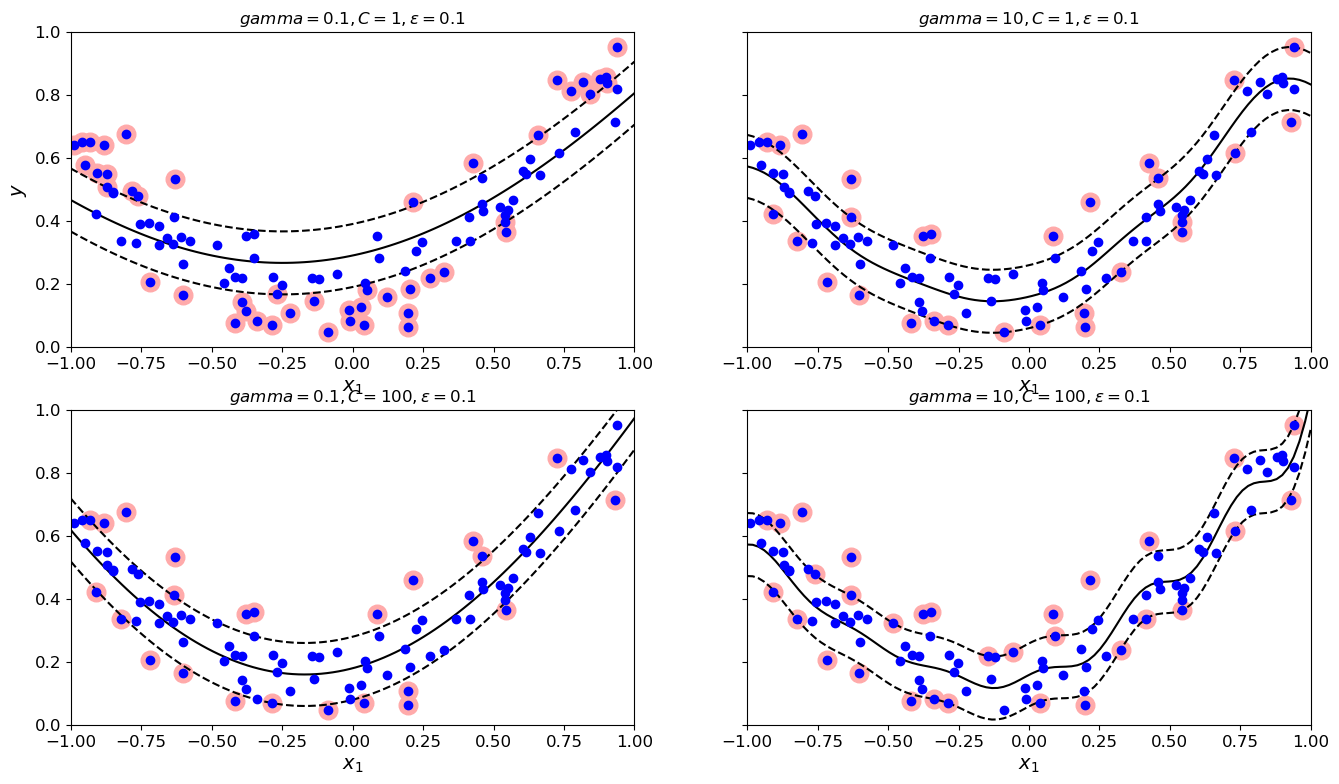

In [ ]:
# 高斯核预测一波
svm_gmm_reg1 = SVR(kernel="rbf",C=1,epsilon=0.1,gamma=0.1)
svm_gmm_reg2 = SVR(kernel="rbf",C=1,epsilon=0.1,gamma=10)
svm_gmm_reg3 = SVR(kernel="rbf",C=100,epsilon=0.1,gamma=0.1)
svm_gmm_reg4 = SVR(kernel="rbf",C=100,epsilon=0.1,gamma=10)

svm_gmm_reg1.fit(X,y)
svm_gmm_reg2.fit(X,y)
svm_gmm_reg3.fit(X,y)
svm_gmm_reg4.fit(X,y)


# 可视化
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(16,9),sharey=True)
plt.sca(axes[0,0])
plot_svm_regression(svm_gmm_reg1,X,y,[-1,1,0,1])
plt.title(r"$gamma={}, C={} ,\epsilon={}$".format(svm_gmm_reg1.gamma,svm_gmm_reg1.C,svm_gmm_reg1.epsilon))
plt.ylabel(r"$y$")

plt.sca(axes[0,1])
plot_svm_regression(svm_gmm_reg2,X,y,[-1,1,0,1])
plt.title(r"$gamma={}, C={} ,\epsilon={}$".format(svm_gmm_reg2.gamma,svm_gmm_reg2.C,svm_gmm_reg2.epsilon))

plt.sca(axes[1,0])
plot_svm_regression(svm_gmm_reg3,X,y,[-1,1,0,1])
plt.title(r"$gamma={}, C={} ,\epsilon={}$".format(svm_gmm_reg3.gamma,svm_gmm_reg3.C,svm_gmm_reg3.epsilon))

plt.sca(axes[1,1])
plot_svm_regression(svm_gmm_reg4,X,y,[-1,1,0,1])
plt.title(r"$gamma={}, C={} ,\epsilon={}$".format(svm_gmm_reg4.gamma,svm_gmm_reg4.C,svm_gmm_reg4.epsilon))
plt.savefig("ouput_plot/guss_reg.png")
plt.show()




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)
std_scaler = StandardScaler()
x_std = std_scaler.fit_transform(X)
# 定义参数的组合
params = {
    'kernel': ('linear', 'rbg', 'poly'),
    'C': [0.01, 0.1, 0.5, 1, 2, 10, 100,1000,10000]
    }

# 用网格搜索方式拟合模型
svm_classification = SVC()
model = GridSearchCV(svm_classification, param_grid=params, cv=10)
model.fit(x_std, y)

# 查看结果
print('最好的参数组合：', model.best_params_)

print('最好的score：', model.best_score_)

最好的参数组合： {'C': 100, 'kernel': 'poly'}
最好的score： 0.9


c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_con

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 创建模拟数据集
X, y = make_moons(n_samples=100,noise=0.15,random_state=42)
std_scaler = StandardScaler()
x_std = std_scaler.fit_transform(X)


svm_model = SVC(kernel='poly')
param_grid = {
    'degree': [2, 3, 4],  # 多项式的度数
    'C': [0.001,0.01,0.1, 1, 10],  # 正则化参数
    #'epsilon': [0.1, 0.01, 0.001]  # 误差容忍度
}


# 定义评估指标
scoring = 'accuracy'

model = GridSearchCV(svm_model, param_grid=param_grid, cv=10)
model.fit(x_std, y)
print('最好的参数组合：', model.best_params_)

print('最好的score：', model.best_score_)

最好的参数组合： {'C': 0.1, 'degree': 3}
最好的score： 0.8900000000000002


In [5]:
# 优化速度
# 加载MNIST数据集
from sklearn.datasets import fetch_openml

data_path = "/optimize/"
mnist = fetch_openml("mnist_784",version=1,data_home=data_path,as_frame=False)


c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.data.shape

(70000, 784)

In [6]:
from sklearn.svm import LinearSVC
import numpy as np
# 获取数据集minst
X = mnist["data"]
y = mnist["target"].astype(np.uint)

# 原数据集已经打乱了，直接取就行.
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# 使用LinearSVC 这个规则是一对多
line_svm = LinearSVC(random_state=42)
line_svm.fit(X_train,y_train)



c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = line_svm.predict(X_train)
accuracy_score(y_train,y_pred)


0.8348666666666666

In [3]:
from sklearn.preprocessing import StandardScaler

std_scaler1 = StandardScaler()
std_train_x = std_scaler1.fit_transform(X_train.astype(np.float32))
std_test_x = std_scaler1.fit_transform(X_test.astype(np.float32))
# 再创建一个LinearSVC
line_svm1 = LinearSVC(random_state=42)
line_svm1.fit(std_train_x,y_train)


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = line_svm1.predict(std_train_x)
accuracy_score(y_train,y_pred)

0.9214

In [7]:
# 使用rbf拟合
from sklearn.svm import SVC

std_scaler1 = StandardScaler()
std_train_x = std_scaler1.fit_transform(X_train.astype(np.float32))
svm_guss_clf = SVC(gamma="scale")
# 只要前10000条
svm_guss_clf.fit(std_train_x[:10000],y_train[:10000])



SVC()

In [ ]:
# 用训练了10000条数据的模型评估60000条的结果
y_pred = svm_guss_clf.predict(std_train_x)
accuracy_score(y_train,y_pred)

0.9455333333333333

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal,uniform



#reciprocal(0.001, 0.1)表示gamma参数的倒数在0.001到0.1之间均匀分布
#而uniform(1, 10)表示C参数在1到10之间均匀分布。
param_distributions = {"gamma":reciprocal(0.001,0.1),"C":uniform(1,10)}
rnd_search_cv = RandomizedSearchCV(svm_guss_clf,param_distributions,n_iter=10,verbose=2,cv=3)
rnd_search_cv.fit(std_train_x[:1000],y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=8.359831757705699, gamma=0.04002492922597183; total time=   0.0s
[CV] END .....C=8.359831757705699, gamma=0.04002492922597183; total time=   0.0s
[CV] END .....C=8.359831757705699, gamma=0.04002492922597183; total time=   0.0s
[CV] END .....C=2.618691221041196, gamma=0.04221434240026619; total time=   0.0s
[CV] END .....C=2.618691221041196, gamma=0.04221434240026619; total time=   0.0s
[CV] END .....C=2.618691221041196, gamma=0.04221434240026619; total time=   0.0s
[CV] END .....C=8.367287453922572, gamma=0.04605871347803841; total time=   0.0s
[CV] END .....C=8.367287453922572, gamma=0.04605871347803841; total time=   0.0s
[CV] END .....C=8.367287453922572, gamma=0.04605871347803841; total time=   0.0s
[CV] END ...C=2.878953884984816, gamma=0.0024094898046911877; total time=   0.0s
[CV] END ...C=2.878953884984816, gamma=0.0024094898046911877; total time=   0.0s
[CV] END ...C=2.878953884984816, gamma=0.0024094

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002316FE72520>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002316FC05670>},
                   verbose=2)

In [11]:
print(rnd_search_cv.best_estimator_)
print(rnd_search_cv.best_score_)

SVC(C=4.433272823455872, gamma=0.0012185260443758057)
0.8629947312582044


In [12]:
rnd_search_cv.best_estimator_.fit(std_train_x,y_train)


NameError: name 'std_test_x' is not defined

In [13]:
y_pred = rnd_search_cv.best_estimator_.predict(std_train_x)
print(accuracy_score(y_train,y_pred))
#测试
# std_X_test = std_scaler1.fit_transform(X_test.astype(np.float32))
# y_pred = rnd_search_cv.best_estimator_.predict(std_X_test)
# print(accuracy_score(y_test,y_pred))